In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los archivos CSV
file1 = 'results_pure/classification_results_pure.csv'  
file2 = 'results_salt/classification_results_salt.csv'  

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Verificar los datos
df1.head(), df2.head()

(                       Classifier  Accuracy  Precision    Recall  F1-Score  \
 0                       LinearSVC  0.713136   0.843367  0.713136  0.748137   
 1                  LGBMClassifier  0.848835   0.878781  0.848835  0.858839   
 2          RandomForestClassifier  0.886865   0.889102  0.886865  0.887905   
 3      GradientBoostingClassifier  0.808341   0.872683  0.808341  0.827020   
 4  HistGradientBoostingClassifier  0.849436   0.879377  0.849436  0.859412   
 
    Log Loss  
 0       NaN  
 1  0.270111  
 2  0.249872  
 3  0.294111  
 4  0.270396  ,
                        Classifier  Accuracy  Precision    Recall  F1-Score  \
 0                       LinearSVC  0.674147   0.692518  0.674147  0.677360   
 1                  LGBMClassifier  0.738973   0.740373  0.738973  0.728162   
 2          RandomForestClassifier  0.745294   0.752312  0.745294  0.731473   
 3      GradientBoostingClassifier  0.745634   0.753984  0.745634  0.731089   
 4  HistGradientBoostingClassifier  0.

In [2]:
def plot_metric_comparison(df1, df2, metric, xlabel, xlim=None, loc='upper right'):
    """
    Bar chart to compare a metric between two files,
    with solid and hatched bars completely overlapped,
    adjusting the size of labels and texts.

    :param df1: First DataFrame with classifier results.
    :param df2: Second DataFrame with classifier results.
    :param metric: Metric to plot (DataFrame column).
    :param xlabel: X-axis label.
    :param xlim: Tuple with the range of the X-axis (optional).
    """
    classifiers = df1["Classifier"]
    x = np.arange(len(classifiers))  # Positions on the Y-axis

    fig, ax = plt.subplots(figsize=(14, 10))  # Chart size

    # Draw hatched bars for the second file
    ax.barh(
        x,
        df2[metric],
        color='none',  # Transparent background
        edgecolor='black',
        height=0.6,
        hatch='//',
        label='NaCl Solution'
    )

    # Draw solid bars for the first file (behind)
    ax.barh(
        x,
        df1[metric],
        color='skyblue',
        edgecolor='black',
        height=0.6,
        alpha=0.6,
        label='Pure Water'
    )

    # Chart configuration
    ax.set_yticks(x)
    ax.set_yticklabels(classifiers, fontsize=24)  # Classifier names size
    ax.set_xlabel(xlabel, fontsize=26)  # X-axis label size
    ax.tick_params(axis='x', labelsize=24)  # X-axis numbers size
    ax.tick_params(axis='y', labelsize=24)  # Y-axis numbers size
    ax.legend(fontsize=18, loc=loc)  # Legend size
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    if xlim:
        ax.set_xlim(xlim)

    plt.tight_layout()
    plt.show()


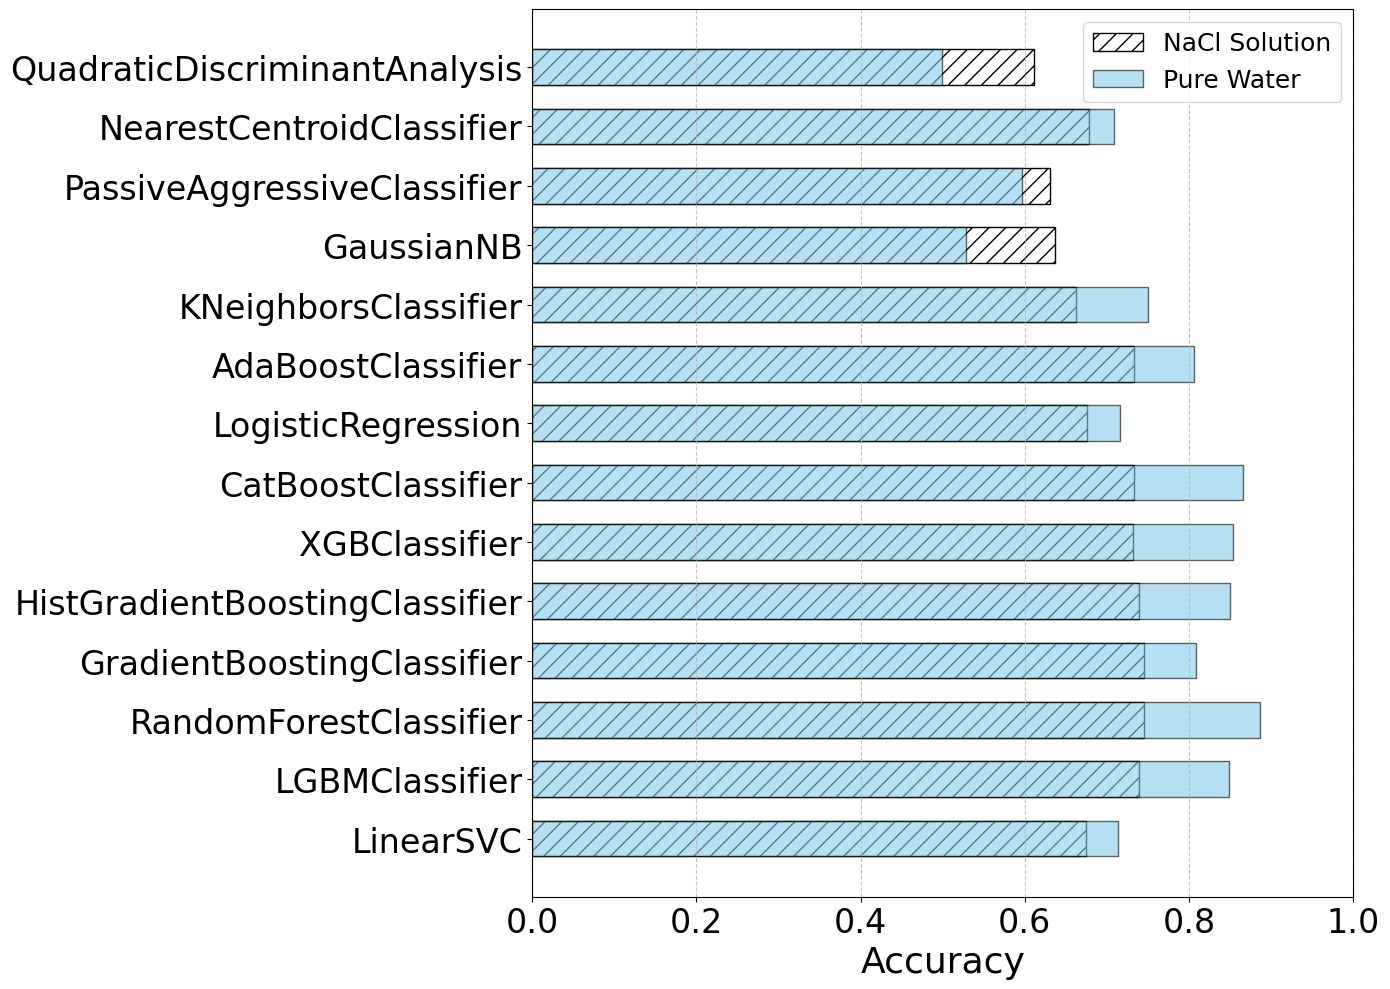

In [3]:
plot_metric_comparison(
    df1, 
    df2, 
    metric="Accuracy", 
    # title="Classifiers Accuracy", 
    xlabel="Accuracy", 
    xlim=(0, 1)  
)


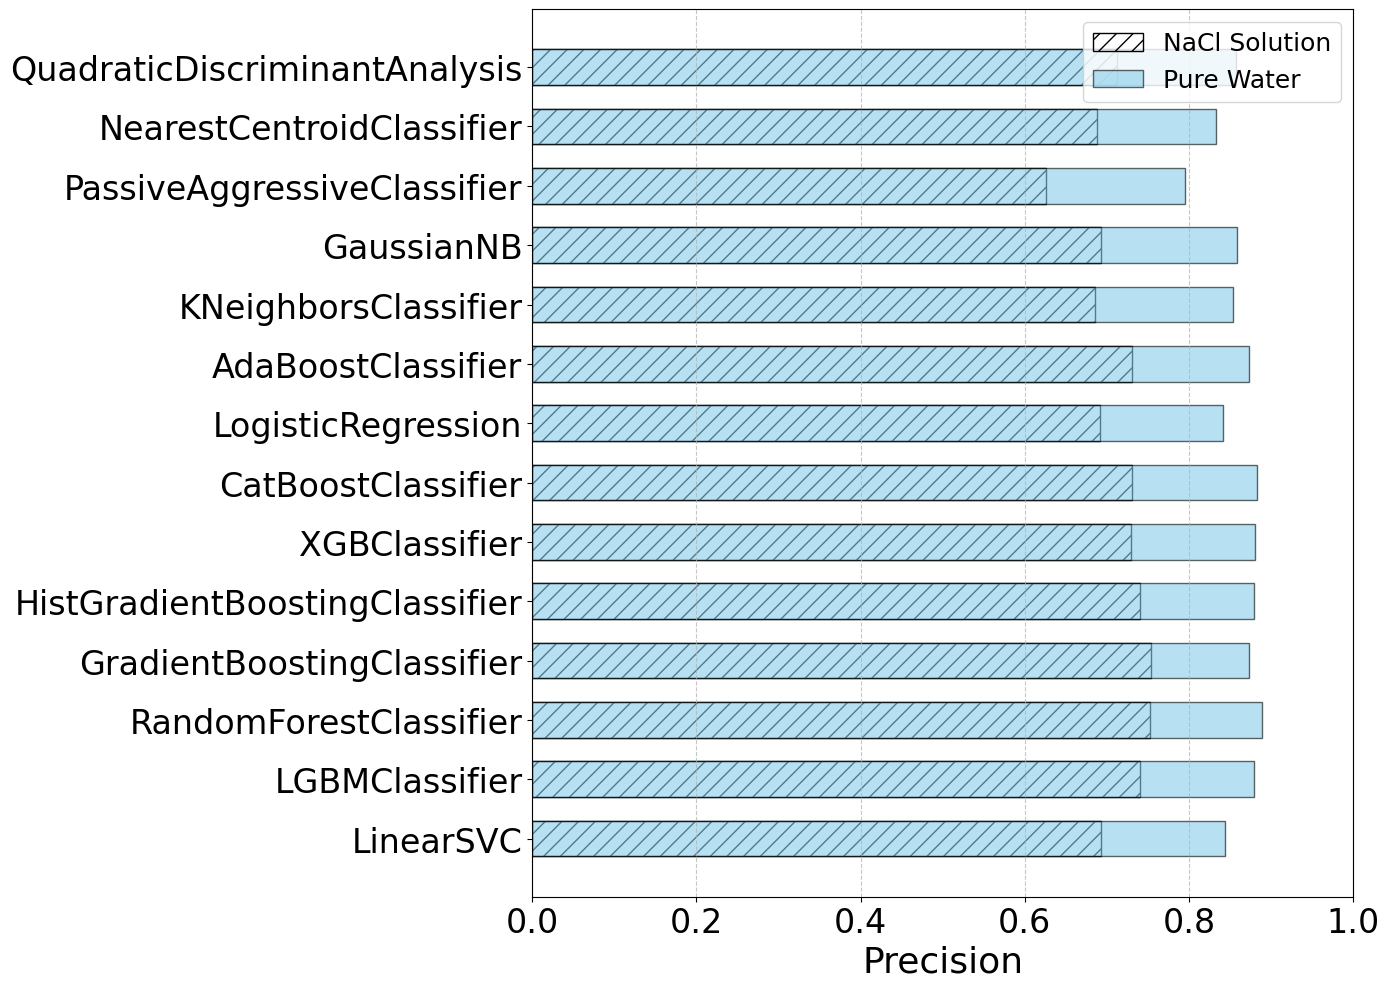

In [4]:
plot_metric_comparison(
    df1, 
    df2, 
    metric="Precision", 
    # title="Classifiers Precision", 
    xlabel="Precision", 
    xlim=(0, 1) 
)


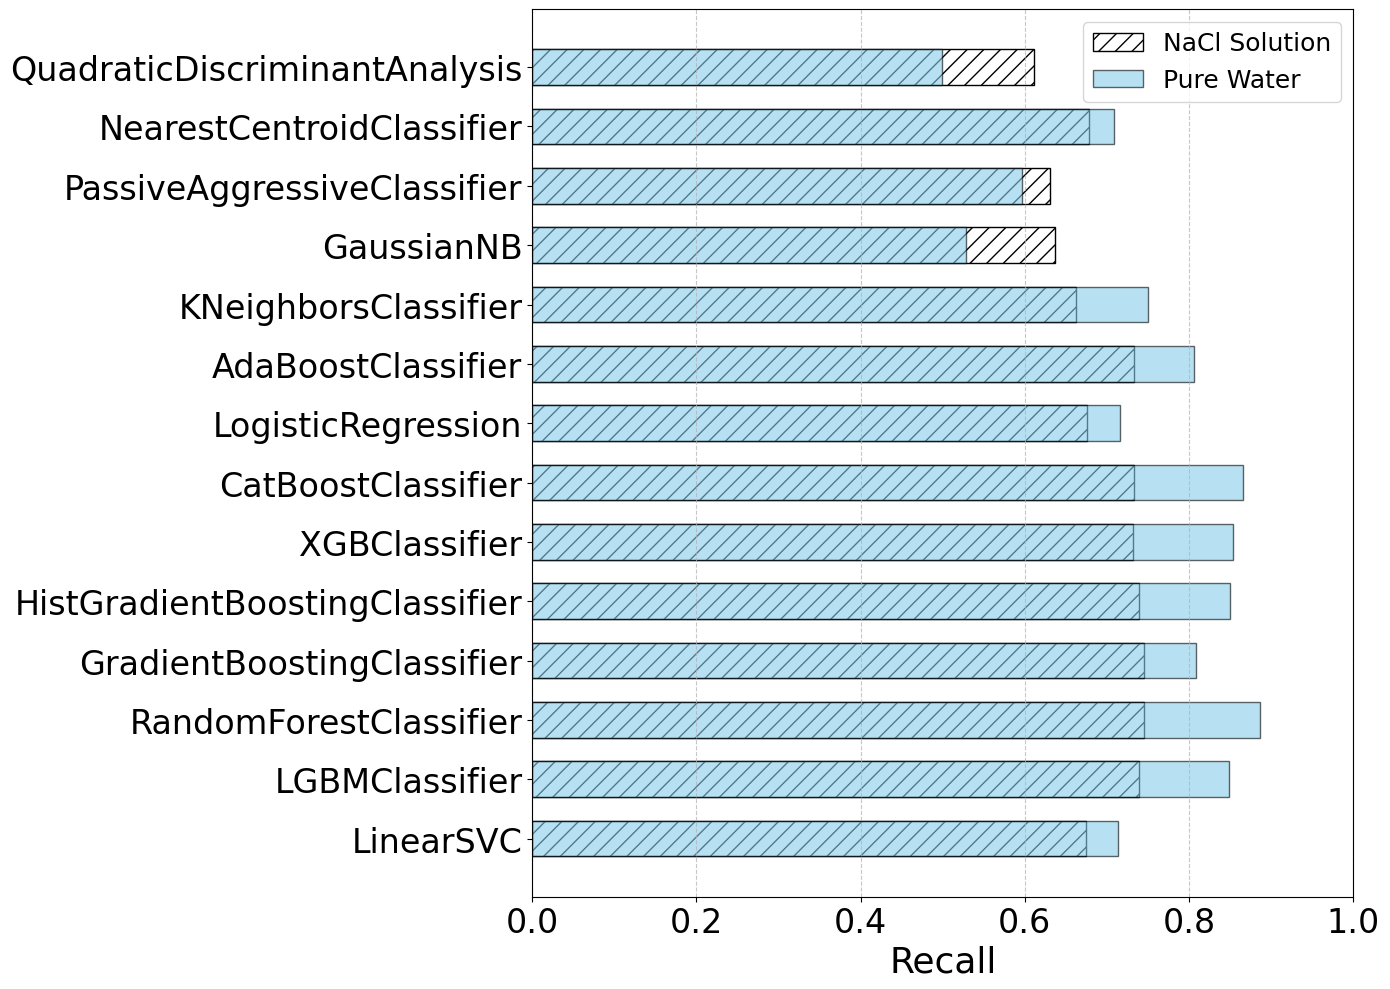

In [5]:
plot_metric_comparison(
    df1, 
    df2, 
    metric="Recall", 
    # title="Classifiers Recall", 
    xlabel="Recall", 
    xlim=(0, 1)  
)


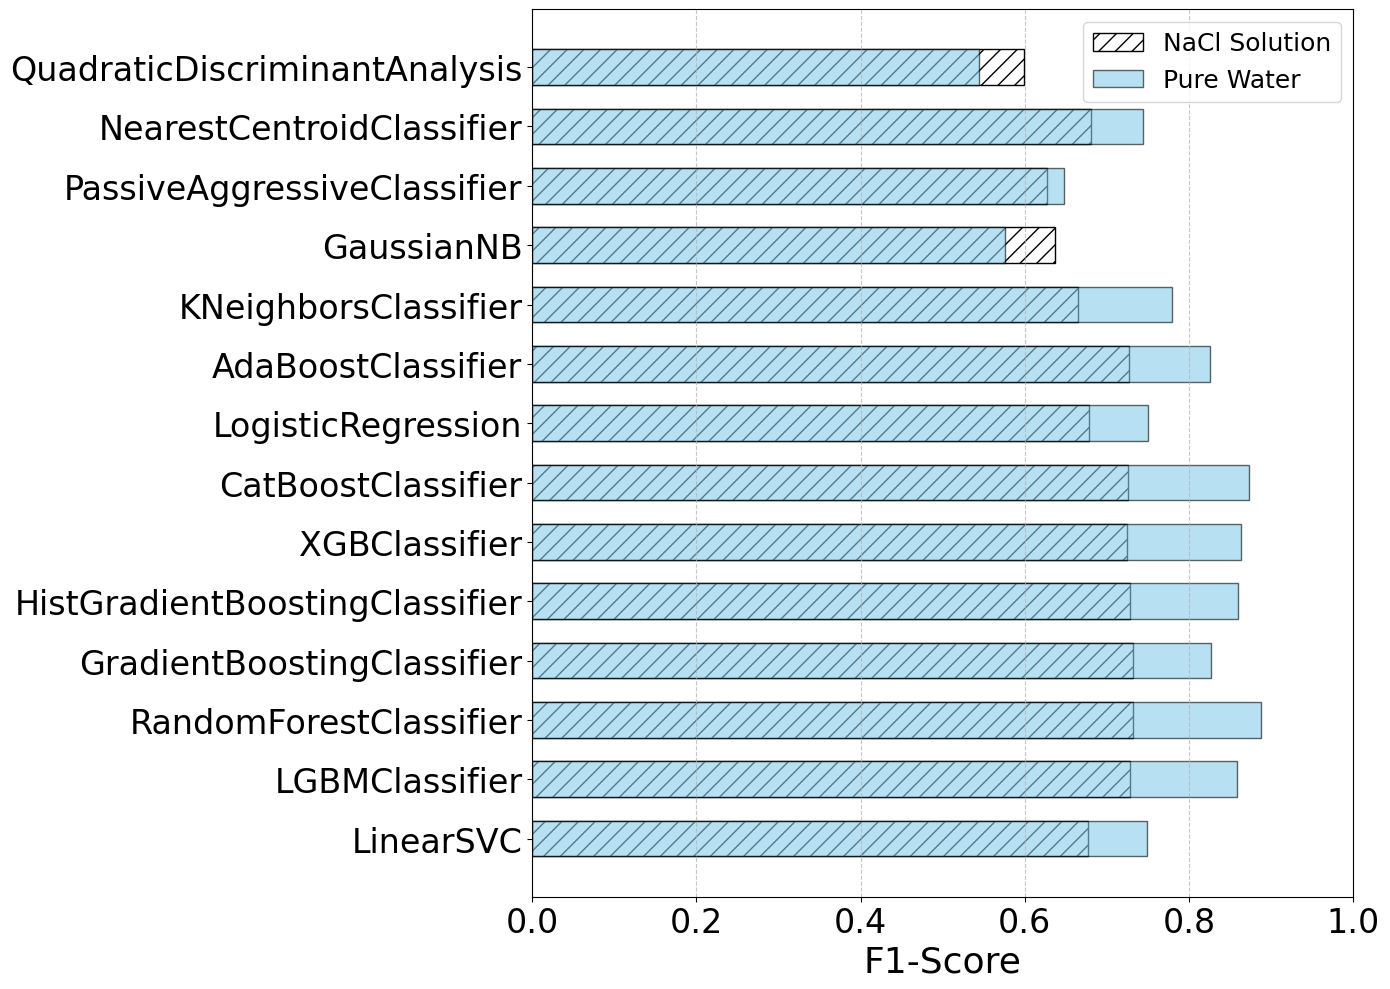

In [6]:
plot_metric_comparison(
    df1, 
    df2, 
    metric="F1-Score", 
    # title="Classifiers F1-Score", 
    xlabel="F1-Score", 
    xlim=(0, 1)  
)


/tmp/ipykernel_238917/2264988697.py:58: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)


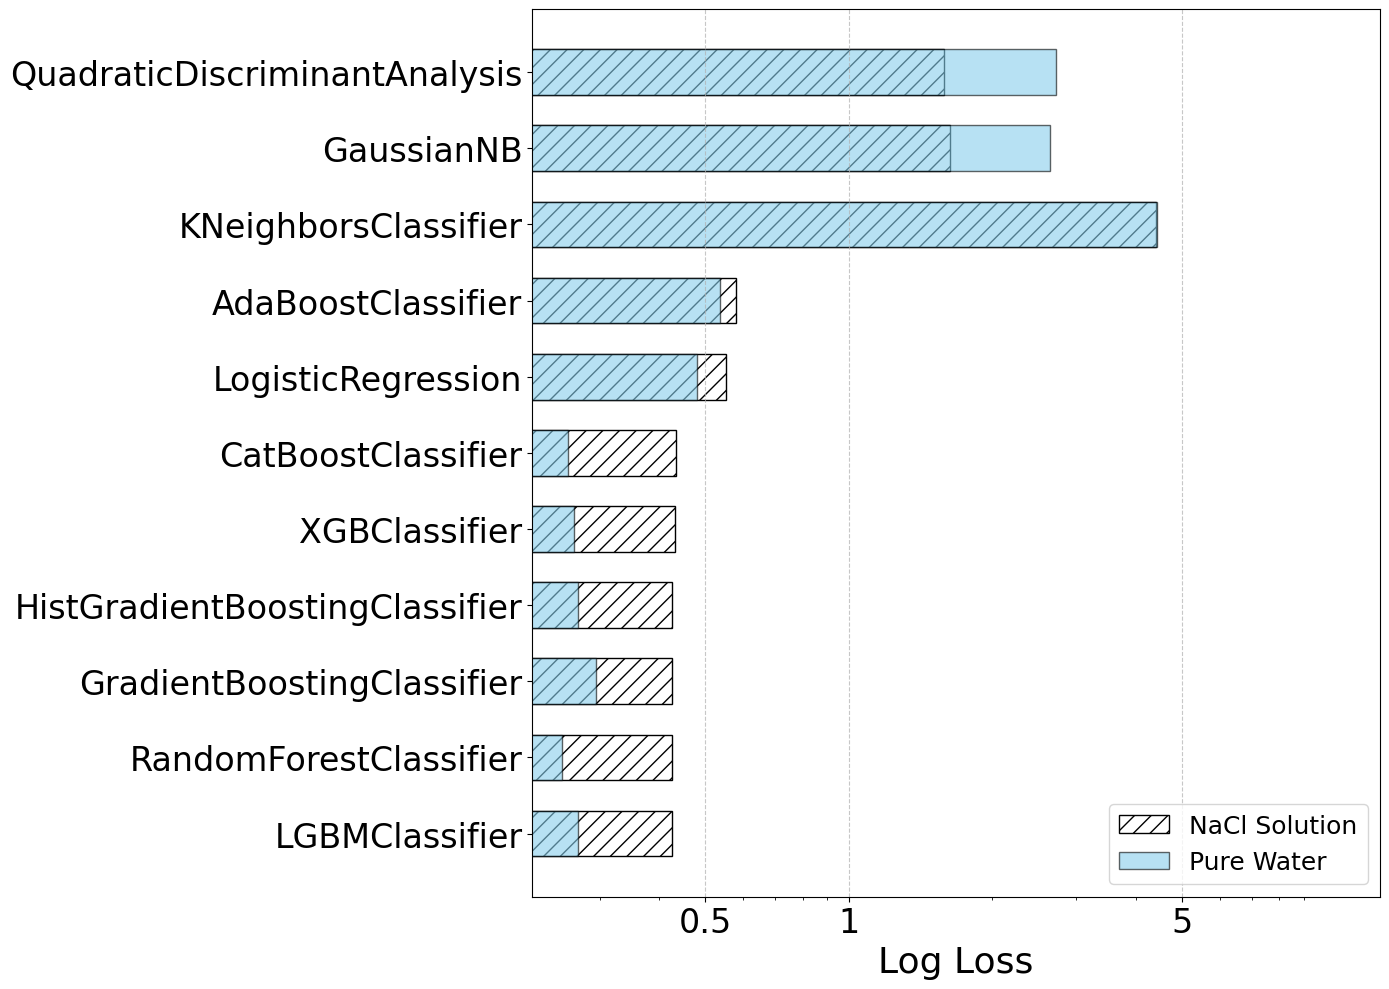

In [7]:
def plot_log_loss_comparison(df1, df2, title="Classifiers Log Loss", xlim=(0, 13), loc='lower right'):
    """
    Specific plot to compare Log Loss with square root transformation.
    """
    metric = "Log Loss"
    xlabel = "Log Loss"

    # Filter classifiers with non-null values in Log Loss
    valid_indices = df1[metric].notna() & df2[metric].notna()
    df1_valid = df1[valid_indices]
    df2_valid = df2[valid_indices]

    classifiers = df1_valid["Classifier"]
    x = np.arange(len(classifiers))

    fig, ax = plt.subplots(figsize=(14, 10))

    # Draw hatched bars for the second file
    ax.barh(
        x,
        df2_valid[metric],
        color='none',
        edgecolor='black',
        height=0.6,
        hatch='//',
        label='NaCl Solution'
    )

    # Draw solid bars for the first file (behind)
    ax.barh(
        x,
        df1_valid[metric],
        color='skyblue',
        edgecolor='black',
        height=0.6,
        alpha=0.6,
        label='Pure Water'
    )

    # Set logarithmic scale for the X-axis
    ax.set_xscale('log')

    # Manually set ticks in the range 1, 10
    ax.set_xticks([0.5, 1, 5])  # Tick locations
    ax.set_xticklabels([0.5, 1, 5])  # Labels for those ticks

    # Chart configuration
    ax.set_yticks(x)
    ax.set_yticklabels(classifiers, fontsize=24)
    ax.set_xlabel(xlabel, fontsize=26)
    # ax.set_title(title, fontsize=30)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.legend(fontsize=18, loc=loc)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    if xlim:
        ax.set_xlim(xlim)

    plt.tight_layout()
    plt.show()

# Call the function with DataFrames `df1` and `df2`
plot_log_loss_comparison(df1, df2)

/tmp/ipykernel_238917/2264988697.py:58: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)


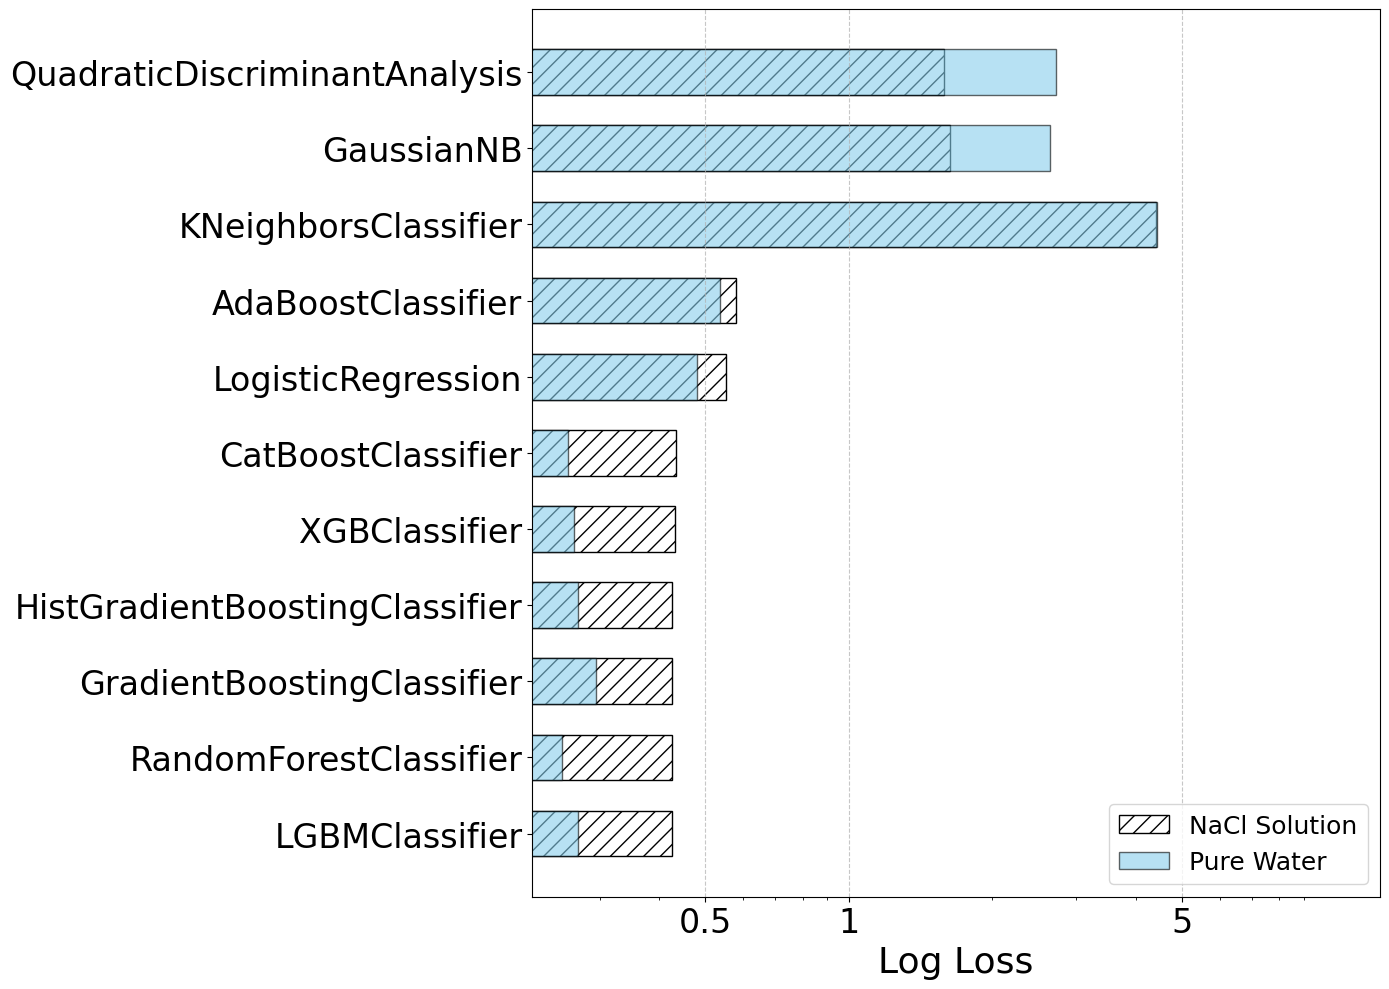

In [8]:
plot_log_loss_comparison(df1, df2)